<span style="font-size:18px">
<span style="font-family:Georgia"> 
    
# <font color=maroon>Introduction

In the culture of statistical inference, particularly within the Frequentist framework, probability is understood in terms of **long-run frequency** — the idea that the probability of an event reflects how often it would occur in a large number of repeated trials. This foundational view supports much of modern data analysis, where conclusions about a **target population** are drawn based on a smaller, representative sample.

The **target population** refers to the complete group we aim to understand, but due to practical constraints, data is typically collected from a **sampled population**, ideally chosen at random. A **random sample** ensures that every member of the population has a known and equal chance of selection, which allows the use of probability theory to justify the reliability of inferences. From this sample, we compute **statistics** — such as the sample mean, variance, or proportion — which are numerical summaries based solely on observed data. These statistics are then used to estimate unknown characteristics (parameters) of the population. To evaluate and support these estimations, we rely on **theoretical probability distributions**, which describe how such statistics would behave across many repeated samples. Altogether, these concepts enable us to make reasoned, probabilistic statements about populations using only sample data.


    
## Sampling Distribution 

Frequntist probability of an event $\mathcal{A}$ (from a random experiment, $\mathcal{E}$) is based on relative frequency (number of times $\mathcal{A}$ is repeated) in many trials of $\mathcal{E}$. Here, probability is defined as a repeatable objective way out of "sufficiently" long-run of the experiment. This may be understood as

$$p(\mathcal{A})= \lim_{n \to \infty} \frac{m}{n}$$

where $n$ is the number of trials of $\mathcal{E}$ and $m$ is  the frequency of $\mathcal{A}$ in $n$ trials

This basic notion is considered while building the inferential principles of frequntist statistics. Most of the studies (involved with random experiments) are conducted with samples drawn from a study population which is a part (or subset) of a target population about which the study is aimed to generalize the findings from sample. In this process, data is expected to be a repeatable process in that samples are drawn from many trials. There could be many sampling methods through which data are collected for a reasonable way to get representative samples so as to generealize the quantity of interest (parameter) about the population. Further, it is assemed that parameters are fixed constant but random and **inference** about it can be done via the samples

While doing so, it is assuemd that (theoretically) once the quantity leading to the parameter is calculated from each sample for "sufficiently large" number of times. That gives a distribution of values for the parameter calculated from the sample which is called **statistic** and the distribution is said to be **Sampling distribution**

<span style="font-size:18px">

# <font color=maroon> An Example - Sampling Distribution

Let us consider our population is Uniform (0,1). So population mean is 0.5

Now we shall sample (of fixed size 'n') from this hypothetical population

Calculate mean of these sampled items

Repeat the process for "sufficently" large number (k) of times

### <font color=darkblue> **Code Decription**

This code illustrates a core concept in the **Frequentist approach to statistical inference** — the idea of a **sampling distribution**. In the Frequentist framework, probability is interpreted as a **long-run relative frequency** based on repeated sampling, and statistical inference is made by understanding how sample statistics behave across these repetitions.

To demonstrate this, we repeatedly draw samples from a **Uniform[0, 1]** distribution, which has a true population mean of 0.5. For each of the `k = 50` repetitions, a random sample of size `n = 100` is taken, and its sample mean is computed. These means form the **sampling distribution of the sample mean**, which is plotted against the sample number. The red dashed line indicates the overall mean of these sample means, which should approach 0.5 — the population mean — due to the **Law of Large Numbers**.

This visualization reinforces the Frequentist idea that:
- The **sampling distribution** becomes more concentrated around the population parameter as the **sample size `n` increases**.
- The shape and behavior of the **sampling distribution** become more evident as the **number of repetitions `k` increases**.

Together, this captures the essence of the Frequentist view — that inference is about understanding how statistics behave **under repeated sampling**, and that reliable estimates arise through the long-run behavior of sample statistics.

---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#INPUTS
n=100 #sample size
k=50 #Repetition

In [7]:
#Function to compute mean of a sample
def avg(a) :
    return(np.mean(np.random.rand(a)))

data=np.full(k,n)
new_list = list(map(avg,data))

In [8]:
dd=pd.DataFrame(new_list)
dd.columns=["Avg"]
dd["Sample"] = range(1, k+1)
# Calculate overall mean
overall_mean = dd["Avg"].mean()
dd = dd[["Sample", "Avg"]]
dd.head()

,Sample,Avg
0,1,0.479713
1,2,0.500167
2,3,0.471211
3,4,0.468328
4,5,0.491133


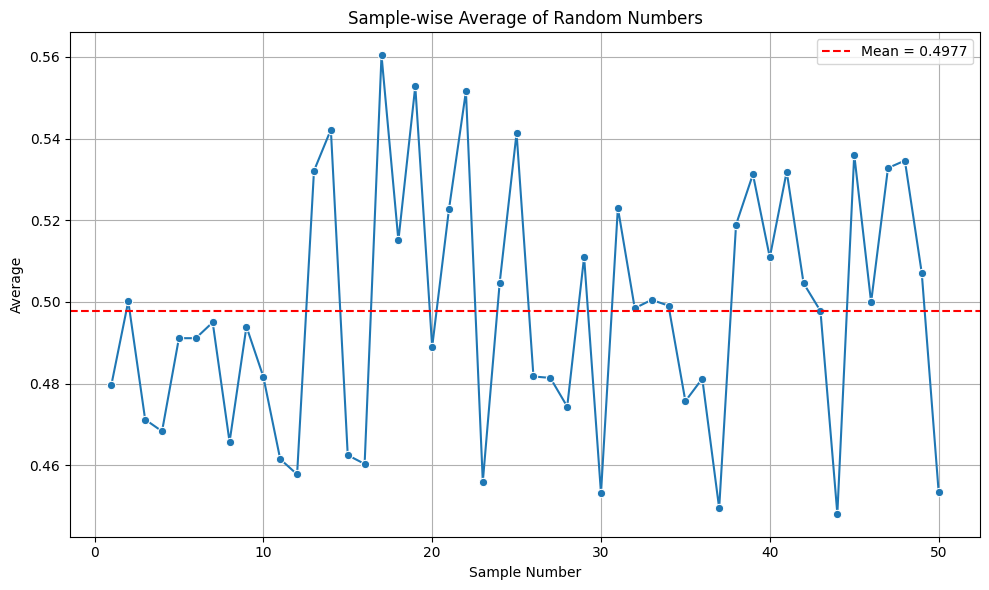

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dd, x="Sample", y="Avg", marker="o")
plt.axhline(overall_mean, color='red', linestyle='--', label=f'Mean = {overall_mean:.4f}')
plt.title("Sample-wise Average of Random Numbers")
plt.xlabel("Sample Number")
plt.ylabel("Average")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="font-size:18px">

## Note:
If this repetition process is run again for different combunation of `k` and `n`, the specific sample means will differ due to randomness, but the overall pattern will remain the same — the sample means will continue to center around the true population mean of 0.5

<span style="font-size:18px">

<span style="font-family:Georgia">

### <font color=darkgreen> Some Useful Statistics (Frequentist View)

In **data science**, a **statistic** is a **numerical summary or function** calculated from **data** — usually from a **sample** — that helps describe, understand, or make inferences about the **underlying population**.

That is, a **statistic** is a **function of the observed data (random sample)** that does **not depend on any unknown parameters**. These are used to **estimate population parameters**, assess variability, or test hypotheses.

Let:
- $X_1, X_2, \dots, X_n$ be a random sample from a population.
- $\mu$: Population mean  
- $\sigma^2$: Population variance  
- $p$: Population proportion

---

### Examples of Common Statistics:
- **Mean (average):** Summarizes the central value.
- **Median:** Middle value when data is sorted.
- **Standard deviation / variance:** Measure variability.
- **Proportion:** Fraction of cases in a certain category (e.g., % of users who clicked).
- **Correlation coefficient (e.g., Pearson's $r$):** Measures strength of association between variables.

---

### Statistic vs Parameter

| Term         | Refers to...             | Known or Unknown?          |
|--------------|--------------------------|-----------------------------|
| **Statistic** | A number from a sample    | Known (we calculate it)     |
| **Parameter** | A number from the population | Unknown (we estimate it) |

---

### Sample Mean ($\bar{X}$)

The average of the sample:

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

- Used to estimate the **population mean** $\mu$

---

### Sample Variance ($S^2$)

The variability within the sample:

$$
S^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})^2
$$

- Estimates the **population variance** $\sigma^2$

---

### Sample Proportion ($\hat{p}$)

In a binary (categorical) sample — e.g., success/failure — let:
- $X_i = 1$ if success, $0$ otherwise

Then:

$$
\hat{p} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

- Estimates the **population proportion** $p$

---

### Key Idea

These statistics:
- Are **computable directly from the data**
- Do **not involve unknown population parameters**
- Form the basis for point estimates, confidence intervals, and hypothesis tests in the **Frequentist** framework



### Additional Examples

**1. Sample moments about Zero**

  $M^{'}_r = \frac{1}{n}\sum X^r_i$  

**2. Sample moments about $\bar{X_n}$**
    
  ${M_r}  = \frac{1}{n}\sum(X_i-\bar{X})^r$
  
**3. Sample Variance**
  
  ${S^2}  = \frac{1}{(n-1)}\sum(X_i-\bar{X})^2$
                                            
For a random variable X, consider population $r^{th}$ moments

1. Non central moments: $\mu^{'}_r = E[X^r]$

2. Central moments:$\mu_r = E[(X-\mu)^r]$

In particular, the Mean of X is $\mu = \mu_1^{'} = E(X)$
  
Now, Consider $M^{'}_r$
  
  $E[M^{'}_r] = E\Big[\frac{1}{n}\sum_{i=1}^n {X_i}^r\Big]$
  
  $=\frac{1}{n}\sum E({X_i}^r)$
  
  $=\frac{1}{n}\sum {\mu'_r}$
  
  $\Rightarrow E[M'_r] = {\mu'_r}$
   
Also $V[M^{'}_r] = V \Big[\frac{1}{n}\sum {X_i}^r\Big]$ where V denotes the variance
   
   $= \frac{1}{n^2}\sum V({X_i}^r)$
   
   $= \frac{1}{n}\Big[E({X_i}^{2r}) - E({X_i^r})^2\Big]$
   
   $V\Big[{M'_r}\Big] = \frac{1}{n}\Big[{\mu'_{2r}}-{\mu'_r}^2\Big]$
  
  In Particular if r = 1,
  
1. $E[M^{'}_1] = E[\bar{X_n}] = \mu^{'}_1 = \mu$

2. $V[M^{'}_1] = V[\bar{X}_n]$

   $= \frac{1}{n}[\mu^{'}_2 - ({\mu^{'}_1})^2]$
   
  $= \frac{1}{n}{\sigma}^2$
  
This holds for any $f(X~|~\theta)$ with $\mu = E(X)$ and $\sigma^2 = V(X)$

**Regarding Sample Variance:**

${S^2}  = \frac{1}{n-1}\sum(X_i-\bar{X})^2$
  
$E[S^2] = \frac{1}{n}\sum_{i=1}^n E{({X_i}-\bar X)}^2$


Now, $\sum{({X_i}-\mu)}^2 = \sum{({X_i}-\bar{X}+\bar{X}-\mu)}^2$

 $= \sum[{({X_i}-\bar{X})}^2 + {(\bar{X}-\mu)}^2 + 2({X_i}-\bar{X})(\bar{X}-\mu)]$

 $= \sum{({X_i}-\bar{X})}^2 + n{(\bar{X}-\mu)}^2 + 2(\bar{X}-\mu)\sum({X_i} -\bar{X})$

Since,$2(\bar{X}-\mu)\sum({X_i}-\bar{X}) = 0$
  
$\sum {({X_i}-\mu)}^2$

$= \sum{({X_i}-\bar{X})}^2 + n{(\bar{X}-\mu)}^2$
  
So

$E[S^2] = \frac{1}{n-1} E\Big[\sum {({X_i}-\mu)}^2  - n{(\bar{X}-\mu)}^2\Big]$

$= \frac{1}{n-1} [\sum E{({X_i}-\mu)}^2  - nE{(\bar{X}-\mu)}^2 ]$

$= \frac{1}{n-1} \Big[\sum {\sigma}^2  - nV(\bar{X})\Big]$

$= \frac{1}{n-1} [n{\sigma}^2  - n \frac{{\sigma}^2}{n}]$

$= {\sigma}^2$
  

Hence for $X_1, X_2, .....X_n \sim f(X~|~\theta)$  then
  
  $E[S^2] = {\sigma}^2$